## Process outline

In [1]:
from merge_tiff import *
from caiman_process import *
from data_proc import *
import tifffile
import caiman as cm
from caiman.source_extraction.cnmf import cnmf as cnmf
from caiman.motion_correction import MotionCorrect
from caiman.source_extraction.cnmf.utilities import detrend_df_f
from caiman.components_evaluation import estimate_components_quality_auto, estimate_components_quality
import os, h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csc_matrix
import scipy
from scipy.stats import norm

### File structure

* input: Madeline's raw data that lives in a folder with a **fixed component(*MEK*)** and a **changing component(*number*)** -> madeline already has that

In [3]:
folder = '\\\\filenest.diskstation.me\\Wilbrecht_file_server\\Madeline\\raw_imaging'
for i, f in enumerate(os.listdir(folder)):
    if i < 20:
        print(f)

.DS_Store
ADT001
ADT002
JUV010
JUV011
JUV012
JUV013


#### Step 1:
* take the directory structure, merge this series of images into one giant tif file (using merge_tiff.py with examples found in `merge_tiff.py`)
``` python
# input tiff_files
merged = merge_tiff(tiff_files ...)
# merged will be a filename 
```

In [5]:
outpath = '/Users/albertqu/Documents/7.Research/Wilbrecht_Lab/madeline_analysis/data'
outfile = merge_tiff_from_folder(folder, outpath)

#### Step 2: Example usage of possible output

In [6]:
root_folder = '/Users/albertqu/Documents/7.Research/Wilbrecht_Lab/madeline_analysis/data/'
os.listdir(root_folder)
hfile = os.path.join(root_folder, 'IT5_190212_plane0_nodecay.hdf5')
hf = h5py.File(hfile, 'r')

In [9]:
C = np.array(hf['estimates/C'])
C.shape

(58, 9000)

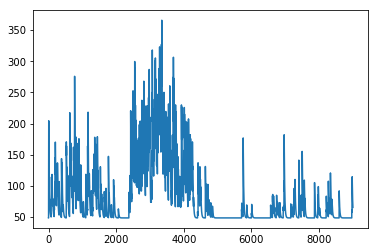

In [11]:
import matplotlib.pyplot as plt
plt.plot(C[0])

In [14]:
def load_A(hf):
    if 'estimates' in hf:
        A = hf['estimates']['A']
    else:
        A = hf['Nsparse']
    data = A['data']
    indices = A['indices']
    indptr = A['indptr']
    return csc_matrix((data, indices, indptr), A['shape'])


A = load_A(hf)

In [15]:
A.shape

(65536, 58)

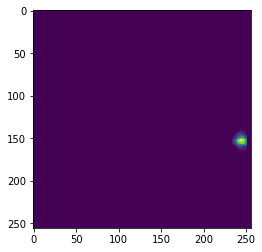

In [19]:
plt.imshow(A.toarray()[:, 17].reshape((256, 256), order='F'))

#### Step3: process raw tif and output hdf5 file with interpretable output

In [8]:
merged_tiff = os.path.join(outpath, 'wlab_merge_nodecay.tif')
fr=4
while not os.path.exists(merged_tiff):
    time.sleep(1)
caiman_main(fr, fnames=[merged_tiff],out=os.path.join(outpath, 'merged_caiman_output.hdf5'))

found nodecay
